# Drawdowns

Let's grab the basic necessities we had previously used, but without fussing around with all the plots.

In [4]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Assets
n = int(input('Please input the number of tickers you want to look at: '))
tickers = []
for i in range(0, n):
    ticker = input(f'Please input ticker {i+1}: ')
    tickers.append(ticker.upper())
print('The tickers you are have chosen are: ', tickers)

# Timeframe
start = '2018-07-01'
end = '2021-07-01'

# Portfolio Returns Data
portfolio = pd.DataFrame()
portfolio_returns = pd.DataFrame()
for ticker in tickers:
    portfolio[ticker] = pdr.DataReader(ticker, 'yahoo', start, end)['Adj Close']
    portfolio_returns[f'{ticker} Returns'] = np.log((portfolio[ticker])).pct_change()

# Market Returns
sp500 = pdr.DataReader('^GSPC', 'yahoo', start, end)['Adj Close']
sp500_returns = (np.log(sp500)).pct_change()

# Sharpe Ratio
sharpe_ratio = pd.DataFrame()
for ticker in tickers:
    sharpe_ratio[ticker] = (portfolio_returns[f'{ticker} Returns'] - sp500_returns) / portfolio_returns[f'{ticker} Returns'].std()

Please input the number of tickers you want to look at:  4
Please input ticker 1:  c
Please input ticker 2:  f
Please input ticker 3:  wmt
Please input ticker 4:  jnj


The tickers you are have chosen are:  ['C', 'F', 'WMT', 'JNJ']


Now let's get into the drawdowns:

In [5]:
drawdown_dataframe = pd.DataFrame()
# Empty dataframe for us to use later

for ticker in tickers:
    wealth_index = (1 + portfolio_returns[f'{ticker} Returns']).cumprod()
    # We have named this variable as the wealth index because this variable will track the wealth of our asset
    # as time moves forward.
    # The cumprod() function is the cumulative product function.
        # The function multiplies the previous value by the current value, which is why we do not have values for
        # the first row of numbers, as there are no values before the first value - hence we get NaNs (Not a Number).
        
    previous_peak = wealth_index.cummax()
    # The previous peak variable will always store the maximum cumulative maximum (.cummax()) value of the asset.
    # This means that if there the current maximum is less than the previous maximum, then the value at this time
    # will be the value at the previous max.
    # When the current maximum exceeds the previous maximum, the new maximum will be chosen until another value
    # exceeds this maximum.
    # This is more clearly illustrated when we display it in a chart.
    
    drawdowns = (wealth_index - previous_peak) / previous_peak
    # This is the definition of the drawdown.
    # The difference between the current returns of the asset compared to the peak, in comparison to the peak.
    
    drawdown_dataframe[f'{ticker} Wealth'] = wealth_index
    drawdown_dataframe[f'{ticker} Peaks'] = previous_peak
    drawdown_dataframe[f'{ticker} Drawdowns'] = drawdowns
    # The above 3 lines of code simply stores our data in the dataframe.
    # Again, we use an f-string so that each time it loops through the tickers, we get 3 new columns for that ticker
    # with that asset's corresponding wealth index, previous peak, and drawdowns.

drawdown_dataframe
# Looking at our data, the number of columns we should have should be 3x the number of assets we have.

,C Wealth,C Peaks,C Drawdowns,F Wealth,F Peaks,F Drawdowns,WMT Wealth,WMT Peaks,WMT Drawdowns,JNJ Wealth,JNJ Peaks,JNJ Drawdowns
Date,,,,,,,,,,,,
2018-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-03,0.995968,0.995968,0.000000,0.995649,0.995649,0.000000,1.001195,1.001195,0.000000,1.001965,1.001965,0.000000
2018-07-05,0.997809,0.997809,0.000000,0.998028,0.998028,0.000000,1.001547,1.001547,0.000000,1.005892,1.005892,0.000000
2018-07-06,0.999927,0.999927,0.000000,0.998423,0.998423,0.000000,1.001385,1.001547,-0.000162,1.007163,1.007163,0.000000
2018-07-09,1.006386,1.006386,0.000000,1.003918,1.003918,0.000000,1.005197,1.005197,0.000000,1.007669,1.007669,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25,1.038932,1.065756,-0.025169,1.186369,1.208792,-0.018550,1.127240,1.146970,-0.017202,1.080845,1.088891,-0.007389
2021-06-28,1.038795,1.065756,-0.025297,1.179703,1.208792,-0.024064,1.126529,1.146970,-0.017822,1.080599,1.088891,-0.007615
2021-06-29,1.032466,1.065756,-0.031235,1.181161,1.208792,-0.022858,1.125200,1.146970,-0.018980,1.080612,1.088891,-0.007603


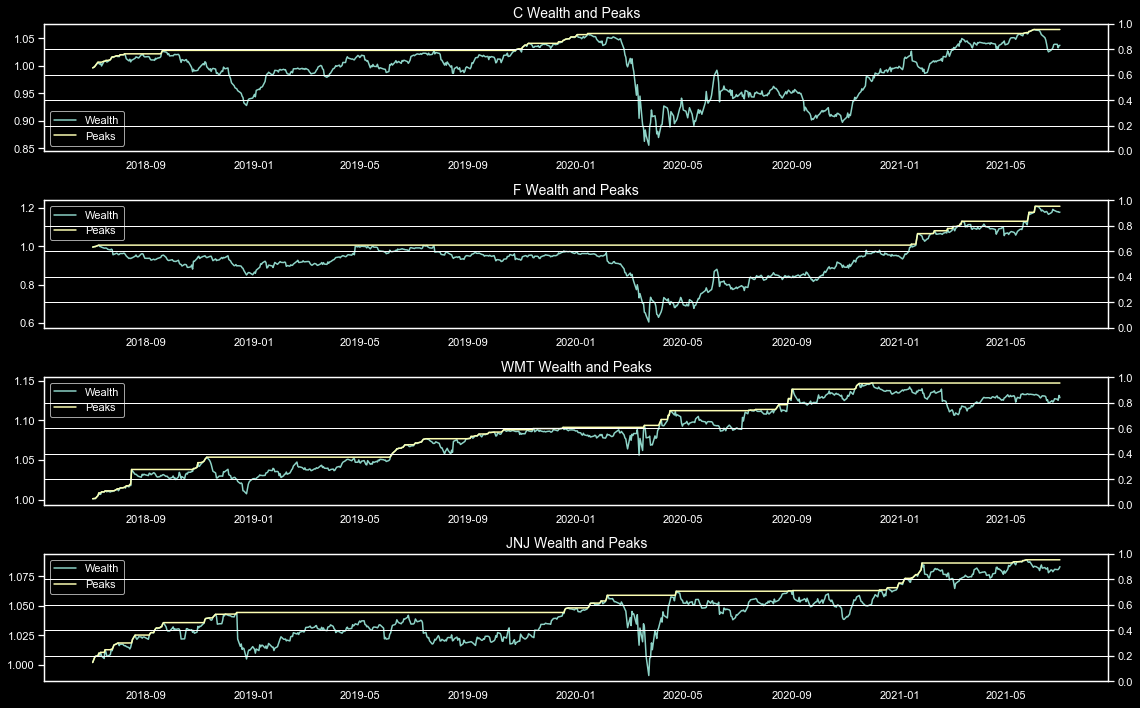

In [6]:
with plt.style.context('dark_background'):
# Again, we set the style of the plots - it's not typically done by anyone but I just like plots that have black backgrounds.
    
    fig, ax = plt.subplots(len(tickers), figsize=(16,10))
    # Notice how we have two variables equalling this one line of code.
    # This is because the plt.subplots() function returns two items - the figure (typically denoted as fig), and the axes
    # (typically denoted as ax).
    
    # We can use this concept for other things too, for example:
    # a, b, c = 1, 2, 3
    # This is equivalent to:
        # a=1, b=2, c=3
        
    # The subplot function allows to create multiple charts (plots) in the same figure.
    # We first have to specify the number of plots we want in the figure, which is why we have used the length function len().
        # What this function does is that it counts the number of items in the variable you enter inside.
        # So we have len(tickers) and if we had 4 tickers then len(tickers) will return 4, and if we had 952 tickers it would
        # return 952.
        # This means the figure will always change in accordance to how many assets we want to look at.
        
    # figsize is simply how large we want the figure to be - (x, y) size.
        
    for i, ticker in enumerate(tickers):
    # Here we use a fancy Python built in enumerate() function.
    # What this function does is that it gives an index value to each of the item in the iterable variable we input.
        # An iterable variable is something like a list, or dictionary, string, or series - something we can perform a loop on.
            # For example, we can perform a loop on a string - Python will go through each character in the string, but we cannot
            # perform on an integer, for example 9, because this is just one item.
            # To perform a loop on a single item, we have to make it into something that's iterable.
            
                # Make a note if you need to ask me for further clarifications because it'll come in useful for more heavy Python 
                # codes such as generators, which isn't harder but you'll need to understand why they exist and their advantages.
                
    # Going back to the enumerate() function, what this does to our tickers variable is that it assigns an index value to each of the
    # tickers.
        # So if we had ['TSLA', 'AAPL', 'JPM', 'WMT'] the enumerate function returns [(0, 'TSLA'), (1, 'AAPL'), (2, 'JPM'), (3, 'WMT')]
        # NOTE: We always start at 0.
        # This is useful because now we can specify the index value of that item.
            # This comes in handy because there are situations where we can only refer to items via numbers, and if only had texts/strings
            # it just wouldn't work.
            # We cannot refer to the AAPLth number of plot
    
        ax[i].twinx()
        # ax[i] refers to the ith subplot
        # The i comes from the index value of the enumerate function.
        # The twinx() function is used to create 2 y axes (left and right).
            # twiny() function would be used to create 2 x axes (top and bottom)
            
        ax[i].plot(drawdown_dataframe[f'{ticker} Wealth'], label='Wealth')
        # Here we are plotting the wealth index on the ith subplot, and we want this to be labelled as Wealth so when we add in a legend it 
        # will be referred to as Wealth - again this can be changed to anything since it's a string.
        
        ax[i].plot(drawdown_dataframe[f'{ticker} Peaks'], label='Peaks')
        # Here we are plotting the previous peaks on the same ith plot and labelling it as peaks.
        
        ax[i].set_title(f'{ticker} Wealth and Peaks', fontsize=14)
        # Now we set the title for the ith subplot as Wealth and Peaks, with a fontsize of 14.
        
        ax[i].legend()
        # We simply add this line to say we want the legend to be in the chart.
        # We can specify where we want the legend to be placed but by default it will find the most suitable location.
        
        ax[i].grid(False)
        # I don't want a grid here because I think it looks better without it, but if you want it just change it to True.
        
        # Notice here everything we have done is applied to the single subplot.
        # For each loop, we will go through each of the assets and the same will be applied to each subplot.
        # When we go through from the first loop, both the variable i and ticker will change.
            # NOTE: Ticker not tickers.
                
    fig.tight_layout();
    # We add a tight to make sure there are no overlap existing in the figure between different subplots.
    # We can comment this line out by adding a # in front and we can see the difference it makes.

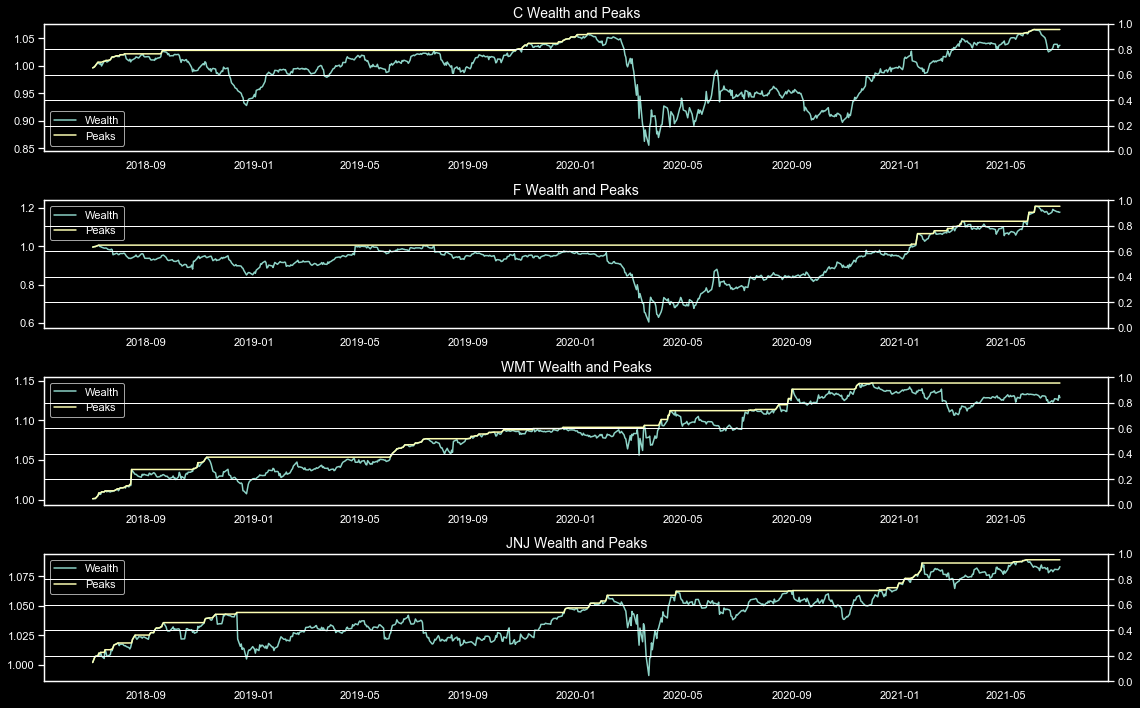

In [7]:
# To sum up:

drawdown_dataframe = pd.DataFrame()
for ticker in tickers:
    wealth_index = (1 + portfolio_returns[f'{ticker} Returns']).cumprod()
    previous_peak = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peak) / previous_peak
    drawdown_dataframe[f'{ticker} Wealth'] = wealth_index
    drawdown_dataframe[f'{ticker} Peaks'] = previous_peak
    drawdown_dataframe[f'{ticker} Drawdowns'] = drawdowns
drawdown_dataframe

with plt.style.context('dark_background'):
    fig, ax = plt.subplots(len(tickers), figsize=(16,10))
    for i, ticker in enumerate(tickers):
        ax[i].twinx()
        ax[i].plot(drawdown_dataframe[f'{ticker} Wealth'], label='Wealth')
        ax[i].plot(drawdown_dataframe[f'{ticker} Peaks'], label='Peaks')
        ax[i].set_title(f'{ticker} Wealth and Peaks', fontsize=14)
        ax[i].legend()
        ax[i].grid(False)
    fig.tight_layout();